# Script for choosing the best dimension of the user and item vectors for the svd model


In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import sys
parent_path = path.abspath('..')
sys.path.insert(0, parent_path)
import dfFunctions
from utils import rmse
import recommender as re


path = parent_path + '/movielens/ml-1m/ratings.dat'
df = dfFunctions.load_dataframe(path)
model = re.SVDmodel(df, 'user', 'item', 'rating', 'svd')

regularizer_constant = 0.05
learning_rate = 0.001
momentum_factor = 0.9
batch_size = 1000
num_steps = 9000

In [ ]:
test_range = range(1,301)
all_dimensions = list(test_range)
results = []
times = []

for dimension in test_range:
    print("\ndimension = {}".format(dimension))
    model.training(dimension,
               regularizer_constant,
               learning_rate,
               momentum_factor,
               batch_size,
               num_steps,
               False)
    users, items, rates = model.test_batches.get_batch()
    predicted_ratings = model.prediction(users,items)
    result = rmse(predicted_ratings, rates)
    results.append(result)
    times.append(model.duration)

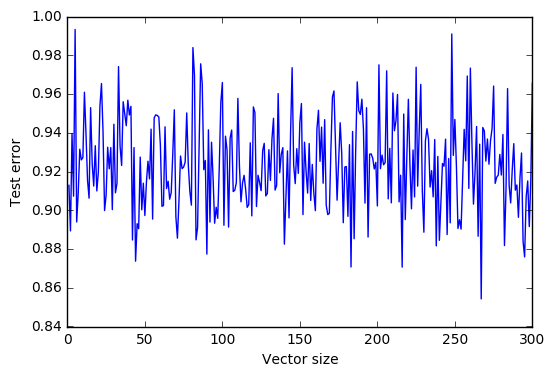

In [3]:
plt.plot(all_dimensions,results)
plt.xlabel('Vector size')
plt.ylabel('Test error')
plt.show()

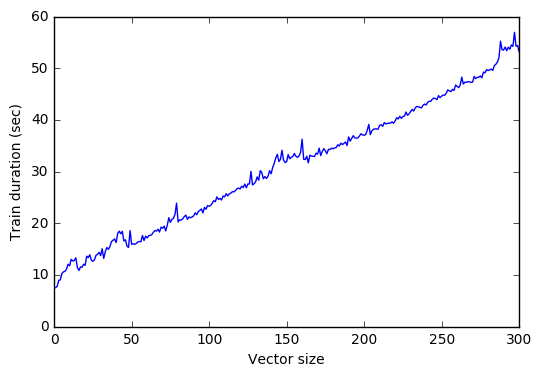

In [4]:
plt.plot(all_dimensions,times)
plt.xlabel('Vector size')
plt.ylabel('Train duration (sec)')
plt.show()

In [5]:
best_result = min(list(zip(results,all_dimensions,times)))
result_string = """In an experiment with sizes from {0} to {1}
the best size for vector representation is {2} with error {3}.
Using this size the training will take {4} seconds""".format(all_dimensions[0],
                                                             all_dimensions[-1:],
                                                             best_result[1],
                                                             best_result[0],
                                                             best_result[2])
print(result_string)

In an experiment with sizes from 1 to [300]
the best size for vector representation is 267 with error 0.8542397022247314.
Using this size the training will take 47.4 seconds
